#**Import DAta and Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import zipfile
import requests
from io import BytesIO

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'

# Download the ZIP file
response = requests.get(url)
with zipfile.ZipFile(BytesIO(response.content)) as z:
    # Extract the specific CSV file
    with z.open('student-mat.csv') as f:
        data = pd.read_csv(f, sep=';')

In [4]:
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
data.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [8]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Use one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Check the new data shape and info
print(data_encoded.shape)
print(data_encoded.info())

(395, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  G1                 395 non-null    int64
 14  G2                 395 non-null    int64
 15  G3                 395 non-null    int64
 16  school_MS          395 non-null    bool 
 17  sex_M 

In [9]:
data_cleaned = data_encoded.dropna(axis=1)

**Visualization**

The distribution of final grades (G3)

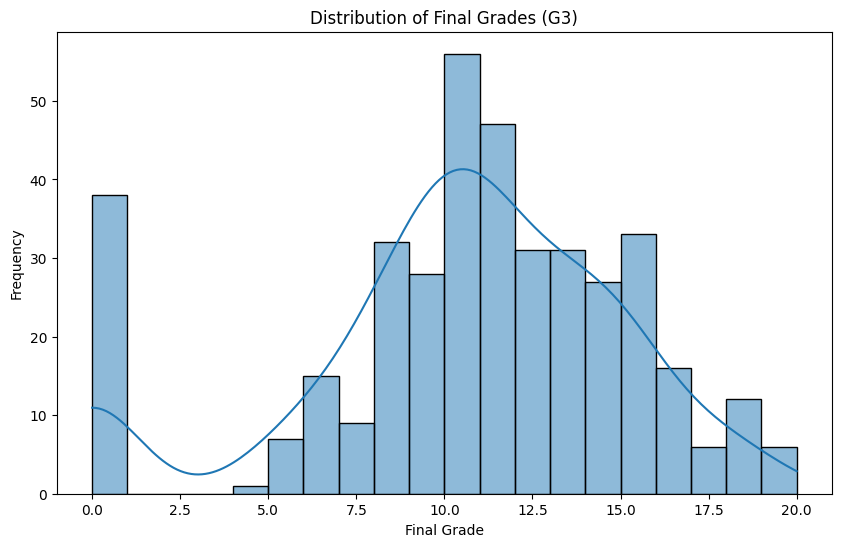

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()

Relation between study and final time

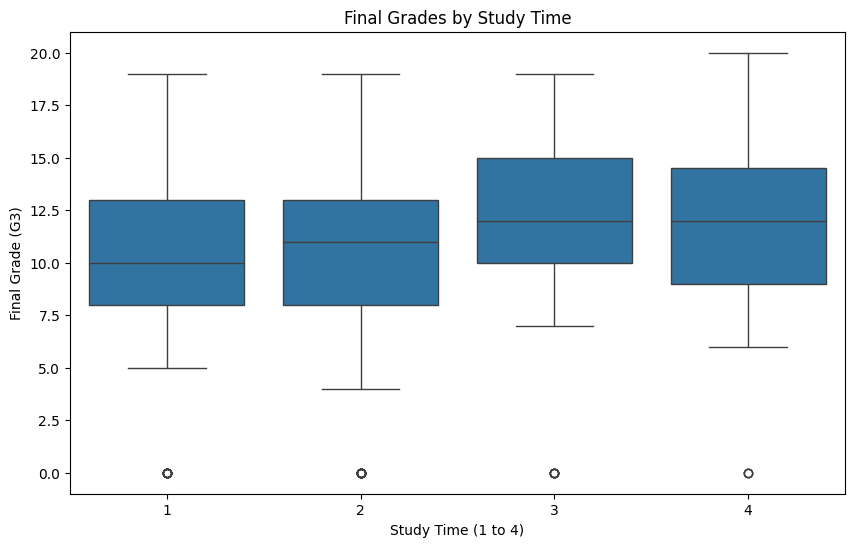

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='G3', data=data_cleaned)
plt.title('Final Grades by Study Time')
plt.xlabel('Study Time (1 to 4)')
plt.ylabel('Final Grade (G3)')
plt.show()


In Reference to parents education level

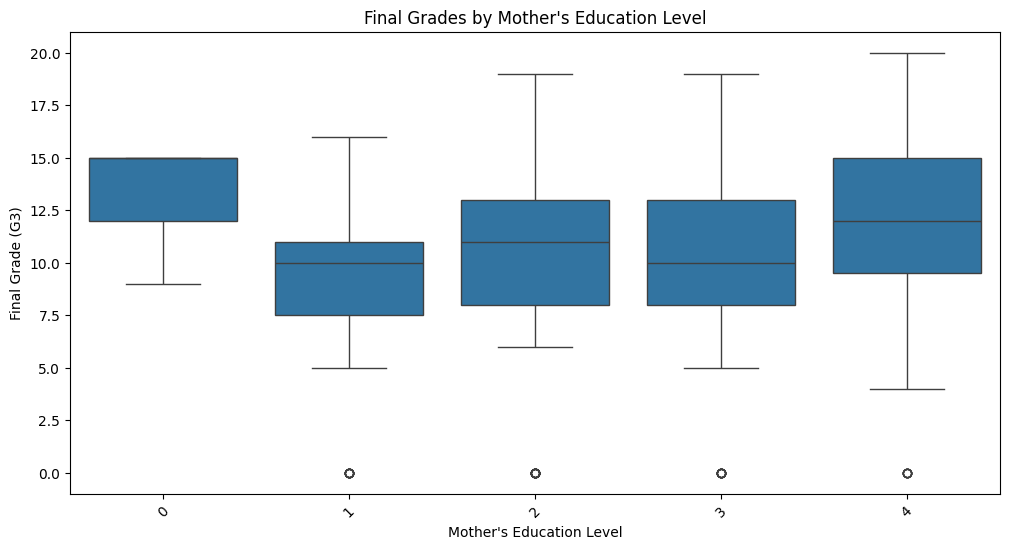

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Medu', y='G3', data=data_cleaned)
plt.title('Final Grades by Mother\'s Education Level')
plt.xlabel('Mother\'s Education Level')
plt.ylabel('Final Grade (G3)')
plt.xticks(rotation=45)
plt.show()


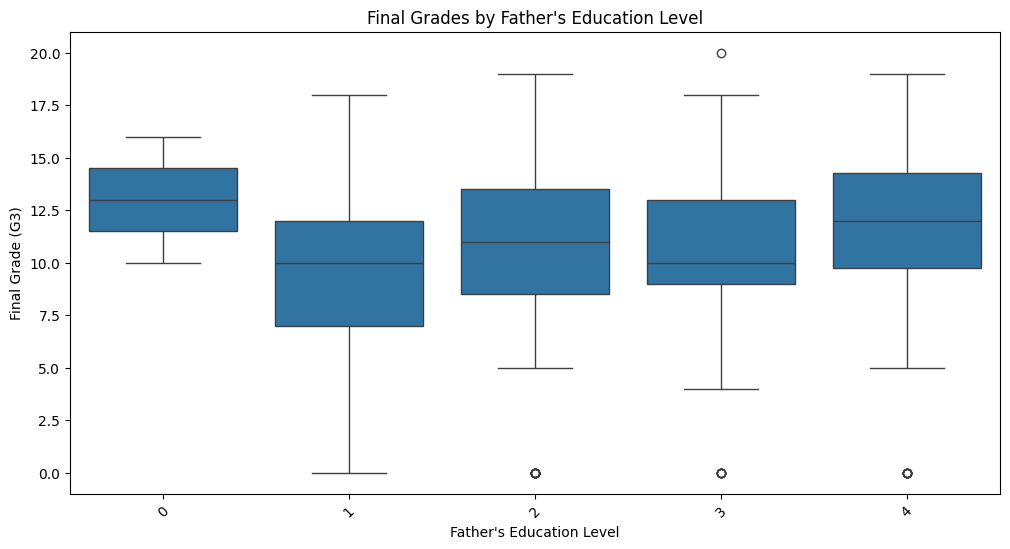

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fedu', y='G3', data=data_cleaned)
plt.title('Final Grades by Father\'s Education Level')
plt.xlabel('Father\'s Education Level')
plt.ylabel('Final Grade (G3)')
plt.xticks(rotation=45)
plt.show()


Genderwise final grade

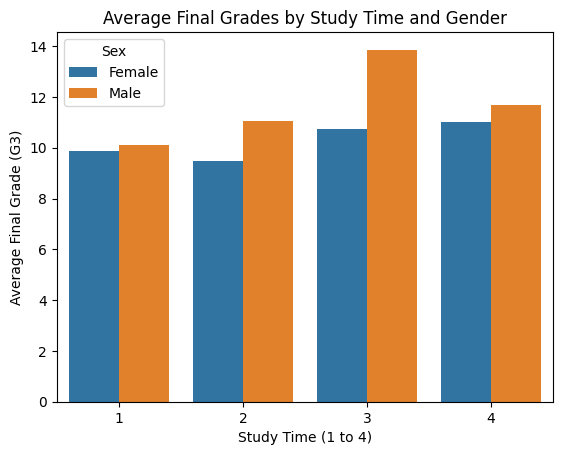

In [14]:
sns.barplot(x='studytime', y='G3', hue='sex_M', data=data_cleaned, errorbar=None)
plt.title('Average Final Grades by Study Time and Gender')
plt.xlabel('Study Time (1 to 4)')
plt.ylabel('Average Final Grade (G3)')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

<ipython-input-15-dfd670159a44>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='studytime', y='G3', hue='age', data=data_cleaned, ci=None)


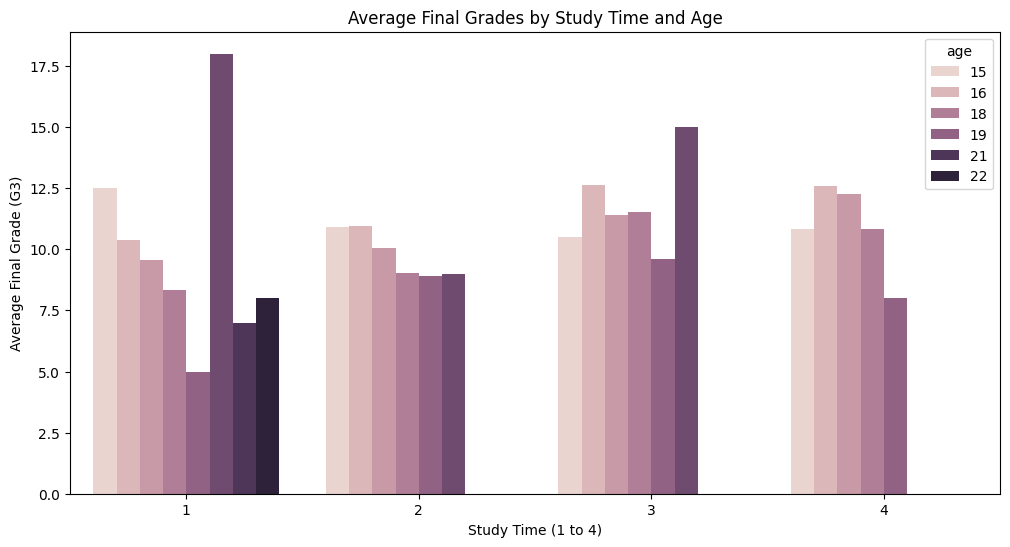

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='studytime', y='G3', hue='age', data=data_cleaned, ci=None)
plt.title('Average Final Grades by Study Time and Age')
plt.xlabel('Study Time (1 to 4)')
plt.ylabel('Average Final Grade (G3)')
plt.legend(title='age')
plt.show()